In [1]:
# Imports
%pip install tensorflow opencv-python matplotlib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
%pip list

Package                      Version
---------------------------- --------
absl-py                      2.1.0
asttokens                    2.4.1
astunparse                   1.6.3
backcall                     0.2.0
certifi                      2024.2.2
charset-normalizer           3.3.2
colorama                     0.4.6
comm                         0.2.1
contourpy                    1.2.0
cycler                       0.12.1
debugpy                      1.6.7
decorator                    5.1.1
distlib                      0.3.6
dm-tree                      0.1.8
executing                    2.0.1
filelock                     3.8.0
flatbuffers                  24.3.7
fonttools                    4.49.0
gast                         0.5.4
google-pasta                 0.2.0
grpcio                       1.62.1
h5py                         3.10.0
idna                         3.6
importlib_metadata           7.0.2
importlib_resources          6.1.3
ipykernel                    6.29.3
ipython 


[notice] A new release of pip available: 22.2.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import tensorflow as tf
import os

In [4]:
gpus = tf.config.experimental.list_physical_devices('GPU')
cpus = tf.config.experimental.list_physical_devices('CPU')
gpus
cpus

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

Image Preprocessing

In [5]:
import cv2
import imghdr
import matplotlib.pyplot as plt

In [6]:
data_dir = 'data/'

In [7]:
def split_dir_to_train_test_val(directory = data_dir,
                            train_size = 0.7,
                            test_size = 0.2,
                            val_size = 0.1):
  """
  Creates 3 folders for Train, Test and Validation data
  """
  import os
  import random
  import shutil

  # Set random seed
  rng = random.Random(42)

  for root, folders, files in os.walk(directory):
    for folder in folders:
      # Create list of the files
      list_of_files = []
      for file_name in os.listdir(root+folder+"/"):
        list_of_files.append(file_name)

      #  Shuffle the list
      rng.shuffle(list_of_files)

      # Create lists of files
      train_files = list_of_files[:int(len(list_of_files)*train_size)]
      test_files = list_of_files[int(len(list_of_files)*train_size) : int(len(list_of_files)*(train_size+test_size))]
      val_files = list_of_files[int(len(list_of_files)*(train_size+test_size)):]

      # Create folders and files for train data
      for one_file in train_files:

        # Copy  files
        dest_dir = "files/train/"+folder+"/"
        os.makedirs(dest_dir, exist_ok=True)

        shutil.copy2(src=(root+folder+"/"+one_file),
                    dst=(dest_dir+one_file))
      print(f"Folder {folder}. Train data copied. {len(train_files)} files")

      # Create folders and files for test data
      for one_file in test_files:
        # Copy  files
        dest_dir = "files/test/"+folder+"/"
        os.makedirs(dest_dir, exist_ok=True)

        shutil.copy2(src=(root+folder+"/"+one_file),
                    dst=(dest_dir+one_file))
      print(f"Folder {folder}. Test data copied. {len(test_files)} files")

      # Create folders and files for validation data
      for one_file in val_files:

        # Copy  files
        dest_dir = "files/validation/"+folder+"/"
        os.makedirs(dest_dir, exist_ok=True)

        shutil.copy2(src=(root+folder+"/"+one_file),
                    dst=(dest_dir+one_file))
      print(f"Folder {folder}. Validation data copied. {len(val_files)} files")




def get_class_names_from_folder(directory):
  """
  Get the classnames from train folder for example
  """
  import pathlib
  import numpy as np
  data_dir = pathlib.Path(directory)
  class_names = np.array(sorted([item.name for item in data_dir.glob("*")])) # Created a list of class names
  return class_names
  print(class_names)

In [8]:
split_dir_to_train_test_val(directory=data_dir,
                            train_size=0.7,
                            test_size=0.2,
                            val_size=0.1)

Folder 707-320. Train data copied. 70 files
Folder 707-320. Test data copied. 19 files
Folder 707-320. Validation data copied. 11 files
Folder 727-200. Train data copied. 70 files
Folder 727-200. Test data copied. 19 files
Folder 727-200. Validation data copied. 11 files
Folder 737-200. Train data copied. 70 files
Folder 737-200. Test data copied. 19 files
Folder 737-200. Validation data copied. 11 files
Folder 737-300. Train data copied. 70 files
Folder 737-300. Test data copied. 19 files
Folder 737-300. Validation data copied. 11 files
Folder 737-400. Train data copied. 70 files
Folder 737-400. Test data copied. 19 files
Folder 737-400. Validation data copied. 11 files
Folder 737-500. Train data copied. 70 files
Folder 737-500. Test data copied. 19 files
Folder 737-500. Validation data copied. 11 files
Folder 737-600. Train data copied. 70 files
Folder 737-600. Test data copied. 19 files
Folder 737-600. Validation data copied. 11 files
Folder 737-700. Train data copied. 70 files
Fold

In [9]:
class_names = get_class_names_from_folder(directory="files/train/")
class_names

array(['707-320', '727-200', '737-200', '737-300', '737-400', '737-500',
       '737-600', '737-700', '737-8', '737-800', '737-9', '737-900',
       '747-100', '747-200', '747-300', '747-400', '747-8', '757-200',
       '757-300', '767-200', '767-300', '767-400', '777-200', '777-300',
       '787-10', '787-8', '787-9', 'A300B4', 'A310', 'A318', 'A319',
       'A320', 'A321', 'A330-200', 'A330-300', 'A340-200', 'A340-300',
       'A340-500', 'A340-600', 'A350-1000', 'A350-900', 'A380', 'ATR-42',
       'ATR-72', 'BAE 146-200', 'BAE 146-300', 'BAE-125', 'Boeing 717',
       'C-130', 'CRJ-200', 'CRJ-700', 'CRJ-900', 'Cessna 172',
       'Cessna 208', 'Cessna 525', 'Cessna 560', 'Challenger 600',
       'DC-10', 'DC-8', 'DC-9-30', 'E-170', 'E-190', 'E-195', 'ERJ 135',
       'ERJ 145', 'Embraer Legacy 600', 'Falcon 2000', 'Falcon 900',
       'Fokker 100', 'Fokker 50', 'Fokker 70', 'Global Express',
       'Gulfstream IV', 'Gulfstream V', 'Il-76', 'L-1011', 'MD-11',
       'MD-80', 'MD-87'

In [10]:
len(class_names)

80

Data Visualisation

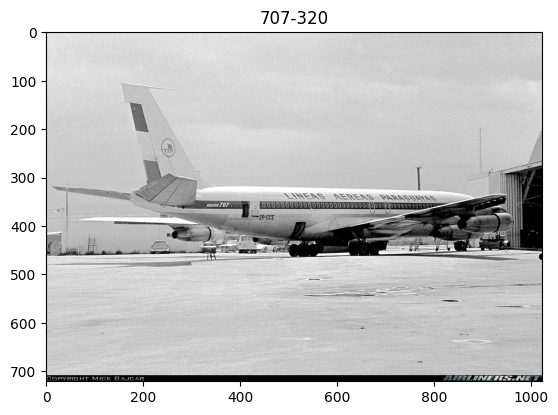

In [11]:
# Let's visualize some images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import os
import random

def visualize_random_image(target_dir, target_class):
  """
  Visualises random image from exact directory
  """
  image_dir = target_dir + target_class
  random_image = random.sample(os.listdir(image_dir), 1)

  img = mpimg.imread(image_dir + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)

visualize_random_image("files/test/", "707-320")

Dataset Creation

In [12]:
import tensorflow as tf

train_data = tf.keras.utils.image_dataset_from_directory(directory="files/train",
                                                            image_size=(256, 256),
                                                            label_mode="categorical",
                                                            batch_size=32)

test_data = tf.keras.utils.image_dataset_from_directory(directory="files/test",
                                                            image_size=(256, 256),
                                                            label_mode="categorical",
                                                            batch_size=32)

validation_data = tf.keras.utils.image_dataset_from_directory(directory="files/validation",
                                                            image_size=(256, 256),
                                                            label_mode="categorical",
                                                            batch_size=32)


normalised_train = train_data.map(lambda x, y: (tf.image.per_image_standardization(x), y))
normalised_test = test_data.map(lambda x, y: (tf.image.per_image_standardization(x), y))
normalised_validation = validation_data.map(lambda x, y: (tf.image.per_image_standardization(x), y))



Found 5598 files belonging to 80 classes.
Found 1521 files belonging to 80 classes.
Found 878 files belonging to 80 classes.


Model Building

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import backend as K

In [14]:
if K.image_data_format() == 'channels_first':
    input_shape = (3, 256, 256)
else:
    input_shape = (256, 256, 3)

In [15]:
AUTOTUNE = tf.data.AUTOTUNE
train_data = train_data.cache().prefetch(buffer_size=AUTOTUNE)
test_data = test_data.cache().prefetch(buffer_size=AUTOTUNE)
validation_data = validation_data.cache().prefetch(buffer_size=AUTOTUNE)

In [16]:
tf.random.set_seed(42)
# Create model

num_classes = len(class_names)

model = Sequential([
    Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=input_shape),
    MaxPooling2D(),
    Conv2D(64, 3, activation='relu'),
    MaxPooling2D(),
    Conv2D(128, 3, activation='relu'),
    MaxPooling2D(),
    Conv2D(256, 3, activation='relu'),
    MaxPooling2D(),
    Conv2D(512, 3, activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(num_classes, activation='softmax')
    ])

c:\Users\atulp\anaconda3\envs\TFModel\lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [ ]:
optimizer = Adam(
    learning_rate=0.5,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-07,
    amsgrad=False,
)

In [20]:
model.compile(
  optimizer='adam',
  loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
  metrics=['accuracy', 'val_loss', 'val_accuracy'])

Model Training

In [21]:
history = model.fit(train_data,
                    epochs=10,
                    validation_data=validation_data)

Epoch 1/10


c:\Users\atulp\anaconda3\envs\TFModel\lib\site-packages\keras\src\backend\tensorflow\nn.py:559: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


175/175 ━━━━━━━━━━━━━━━━━━━━ 175s 987ms/step - accuracy: 0.0137 - loss: 11.7565 - val_accuracy: 0.0137 - val_loss: 4.3819
Epoch 2/10
 25/175 ━━━━━━━━━━━━━━━━━━━━ 2:31 1s/step - accuracy: 0.0073 - loss: 4.3863

: 

Model Evaluation

In [ ]:
model.evaluate(test_data)

In [ ]:
import pandas as pd

pd.DataFrame(history.history).plot()

Predicting

In [ ]:
!wget https://cdn.jetphotos.com/full/6/644684_1708957827.jpg

In [ ]:
def load_and_resize_image(filename, size):

  # Load image
  img = tf.io.read_file(filename)
  
  # Compile image
  img = tf.image.decode_image(img)

  # Resize image
  img = tf.image.resize(img, [size, size])

  # Scale the tensor
  img = img / 255

  return img

image = load_and_resize_image("644684_1708957827.jpg", 256)

In [ ]:
pred = model.predict(tf.expand_dims(image, axis=0_)
pred

In [ ]:
class_names[pred[0].argmax()]